In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../cleaned_dataset_without_na.csv', delimiter='|')
data.head()

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,4-6,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
1,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
2,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
3,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,4-6,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
4,Mieszkanie w świetnej lokalizacji Gdynia Dąbrowa,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508


In [3]:
data = data.drop('title', axis=1)
threshold_low = 5000  # Set your threshold value here
threshold_high = 30000
data = data[data['price_for_m2_in_PLN'] >= threshold_low]
data = data[data['price_for_m2_in_PLN'] <= threshold_high]


In [4]:
data_numerical = data.drop(['city', 'district', 'type_of_market', 'type_of_building', 'floor', 'street'], axis=1)

In [5]:
A = data.drop(['price_for_m2_in_PLN', 'street'], axis=1)
b = data['price_for_m2_in_PLN']
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=0)

In [6]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessor = ColumnTransformer([("cat", cat_pipeline, make_column_selector(dtype_include=object)),], remainder=num_pipeline)
preprocessor = preprocessor.fit(X_train, y_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

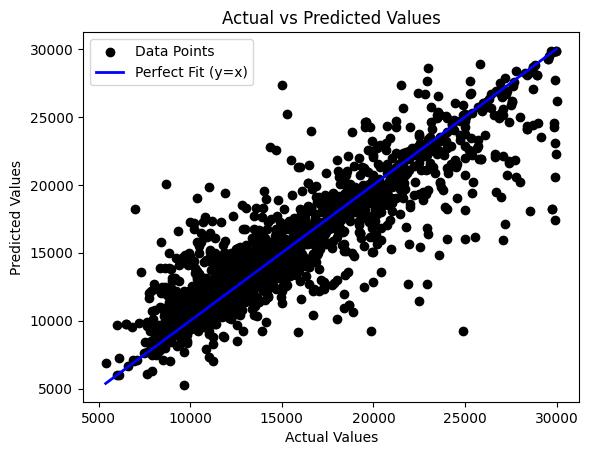

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

model_GB = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=1500, criterion='squared_error')
model_GB.fit(X_train_preprocessed, y_train)
y_pred_GB = model_GB.predict(X_test_preprocessed)
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_GB, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [8]:
rmse_GB = root_mean_squared_error(y_test, y_pred_GB)
rmse_GB

2146.7104898966395

In [9]:
rmsle_GB = root_mean_squared_log_error(y_test, y_pred_GB)
rmsle_GB

0.14218861628733054

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mae_GB = mean_absolute_error(y_test, y_pred_GB)
mae_GB

1274.4135515925427

In [11]:
mape_GB = mean_absolute_percentage_error(y_test, y_pred_GB)
mape_GB

0.08996531349886178

In [12]:
r2_gb = r2_score(y_test, y_pred_GB)
r2_gb

0.809650991747572